## Hand_Writing number detect
### Steps
1. Load data
2. Create Network
3. Train it

In [1]:
# package import
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pylab as plt
from hand_writing.utils import plot_image, plot_curve, one_hot

# step 1 : load mnist data
batch_size = 512
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist data', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))  # convenient for optimize
                               ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist data', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=True)

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


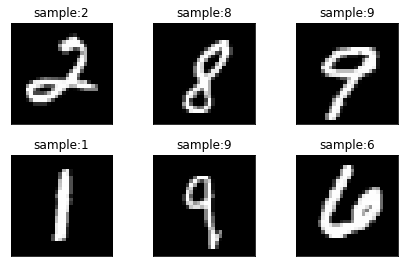

In [2]:
# visualize the sample
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'sample')


0 0 0.12224507331848145
0 10 0.09907738119363785
0 20 0.08728943765163422
0 30 0.07888433337211609
0 40 0.07438649237155914
0 50 0.07088400423526764
0 60 0.06667337566614151
0 70 0.06374461948871613
0 80 0.06084249168634415
0 90 0.05814115330576897
0 100 0.05543956905603409
0 110 0.0521487221121788
1 0 0.049473781138658524
1 10 0.04904208332300186
1 20 0.048673126846551895
1 30 0.04563639685511589
1 40 0.042594317346811295
1 50 0.04529839754104614
1 60 0.04183585196733475
1 70 0.04289010912179947
1 80 0.04095132648944855
1 90 0.03949635103344917
1 100 0.038139887154102325
1 110 0.03899547830224037
2 0 0.04024050384759903
2 10 0.03853674978017807
2 20 0.0385357141494751
2 30 0.037324219942092896
2 40 0.03332764282822609
2 50 0.035443004220724106
2 60 0.03377307578921318
2 70 0.034374866634607315
2 80 0.03498324006795883
2 90 0.03344740718603134
2 100 0.032252237200737
2 110 0.03273244947195053


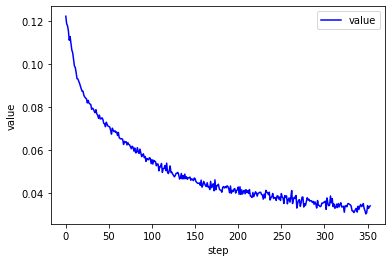

In [4]:
# Step 2 : create network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # xw+b
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x : [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(hw2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)
        return x

In [ ]:
# Step 3 : train network

net = Net()
# [w1,b1,w2,b2,w3,b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train_loss = []
for epoch in range(3):
    for batch_idx, (x, y) in enumerate(train_loader):
        # x: [b,1,28,28], y: [b]
        # print(x.shape,y.shape)
        # break
        # net input should be [b,future]
        # [b,1,28,28] ==> [b,784]
        x = x.view(x.size(0), 28 * 28)
        # ==> [b,10]
        out = net(x)
        y_onehot = one_hot(y)
        # loss = mse(out, y_one_hot)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()
        train_loss.append(loss.item())

        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())
plot_curve(train_loss)
# we got optimal parameters

prediction correction accurate:  0.8809999823570251


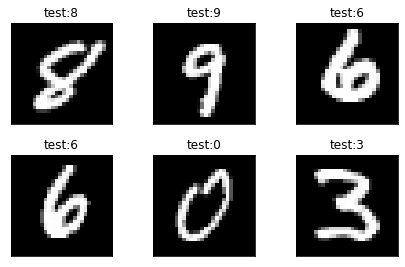

In [7]:
# Step 4 : test
total_correct = 0
for x, y in test_loader:
    x = x.view(x.size(0), 28 * 28)
    out = net(x)
    # out: [b,10]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float()
    total_correct += correct
total_num = len(test_loader.dataset)
acc = total_correct / total_num
print("prediction correction accurate: ", acc.item())

# sample verify
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28 * 28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')